In [1]:
# ✅ Step 1: Import Required Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from PIL import Image

Training Data Shape: (60000, 28, 28)
Test Data Shape: (10000, 28, 28)
Epoch 1/5


D:\python\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.8788 - loss: 0.4467
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9784 - loss: 0.0739
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9857 - loss: 0.0477
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9898 - loss: 0.0335
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9931 - loss: 0.0244
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9805 - loss: 0.0593

Test Accuracy: 98.50%


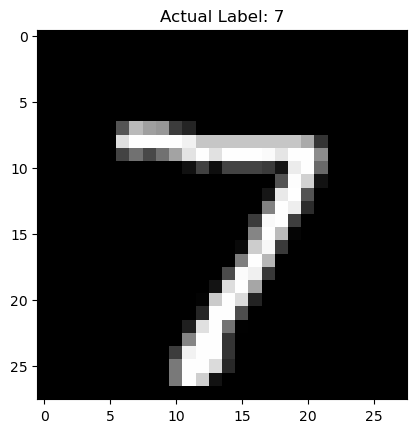

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Predicted Digit: 7


In [2]:
# ✅ Step 2: Load the MNIST Dataset (Already available in TensorFlow)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f"Training Data Shape: {X_train.shape}")
print(f"Test Data Shape: {X_test.shape}")

# ✅ Step 3: Preprocess the Data
# Reshape data to fit CNN input shape
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32') / 255

# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# ✅ Step 4: Build CNN Model
model = Sequential()

# Convolutional Layer
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten + Dense Layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))  # 10 classes for digits 0-9

# ✅ Step 5: Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ✅ Step 6: Train the Model
model.fit(X_train, y_train, epochs=5, batch_size=128, verbose=1)

# ✅ Step 7: Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {accuracy*100:.2f}%")

# ✅ Step 8: Make Prediction on a Sample Test Image
import numpy as np
import matplotlib.pyplot as plt

# Select one test image
sample_image = X_test[0].reshape(1,28,28,1)

# Show Image
plt.imshow(X_test[0].reshape(28,28), cmap='gray')
plt.title("Actual Label: " + str(np.argmax(y_test[0])))
plt.show()

# Predict
prediction = model.predict(sample_image)
predicted_label = np.argmax(prediction)
print(f"Predicted Digit: {predicted_label}")


In [3]:
img = Image.open('three.png').convert('L')

In [4]:
img = img.resize((28,28))

In [5]:
img_array = np.array(img)

In [6]:
img_array = img_array / 255.0

In [7]:
img_array = 1 - img_array 

In [8]:
img_input = img_array.reshape(1,28,28,1)

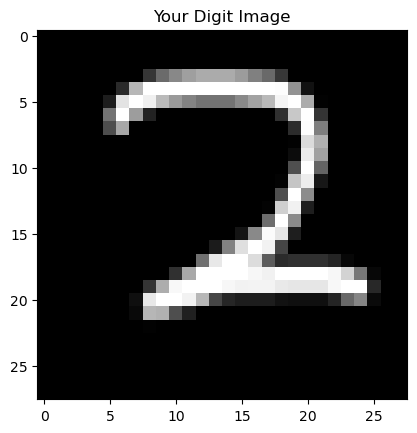

In [9]:
plt.imshow(img_array, cmap='gray')
plt.title("Your Digit Image")
plt.show()

In [10]:
prediction = model.predict(img_input)
predicted_label = np.argmax(prediction)
print(f"Predicted Digit: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted Digit: 2
